In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


# Data Load

In [15]:
training_1 = pd.read_csv('H2T_dynamicData.csv')
training_1 = training_1.values
training_1 = training_1[:,2:6]
print(training_1[0,:])
print(training_1.shape)


[141.223053  147.3916016 151.8453369 130.9859009]
(43647, 4)


In [5]:
from sklearn.model_selection import train_test_split 
# X_train, X_test, y_train, y_test = train_test_split(training_1[:,0:2], training_1[:,2:4],test_size=0.3,random_state=1)
X_train, X_test, y_train, y_test = training_1[:30552,0:2], training_1[30552:43647,0:2],training_1[:30552,2:4], training_1[30552:43647,2:4] 
print(X_train.shape, X_test.shape)
# print(X_train[0:5,:])
# print(min(X_train),max(X_train))

(30552, 2) (13095, 2)


In [6]:
input1_train=X_train[:,0]
input2_train=X_train[:,1]
output1_train=X_train[:,0]
output2_train=X_train[:,1]

input1_test=y_test[:,0]
input2_test=y_test[:,1]
output1_test=y_test[:,0]
output2_test=y_test[:,1]

print(input1_train.shape,output1_train.shape)


(30552,) (30552,)


# Normalization 

In [7]:
def setinrange(X_train):
    r=(X_train-min(X_train))/(max(X_train)-min(X_train))
    return r
def allinlist(data):
    r=[]
    for x in data:
        temp=[]
        temp.append(x)
        r.append(temp)
    return r

scaler1 = MinMaxScaler(feature_range=(0, 1))
scaler2 = MinMaxScaler(feature_range=(0, 1))

scaler1.fit(allinlist(input1_train))
scaler2.fit(allinlist(input2_train))    

input1_train_s = setinrange(input1_train)
input2_train_s = setinrange(input2_train)
output1_train_s = setinrange(output1_train)
output2_train_s = setinrange(output2_train)

scaler3 = MinMaxScaler(feature_range=(0, 1))
scaler4 = MinMaxScaler(feature_range=(0, 1))

input1_test_s = setinrange(input1_test)
input2_test_s = setinrange(input2_test)
output1_test_s = setinrange(output1_test)
output2_test_s = setinrange(output2_test)

scaler3.fit(allinlist(input1_test))
scaler4.fit(allinlist(input2_test))    

# xxx = scaler1.inverse_transform(allinlist(output1_test_s))
# print(len(xxx))
# print(len(output1_test))
# plt.scatter(np.ravel(xxx),output1_test,s=3)
# plt.show()

# print(input1_train_s[0:10])

MinMaxScaler(copy=True, feature_range=(0, 1))

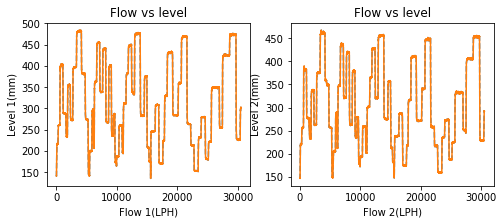

In [9]:
plt.figure(figsize=(8,3))      
plt.subplot(1, 2, 1)
plt.plot(input1_train, '--')
plt.plot(output1_train, '-')
plt.xlabel('Flow 1(LPH)')
plt.ylabel('Level 1(mm)')
plt.title('Flow vs level')
plt.subplot(1, 2, 2)
plt.plot(input2_train, '--')
plt.plot(output2_train, '-')
plt.xlabel('Flow 2(LPH)')
plt.ylabel('Level 2(mm)')
plt.title('Flow vs level')
plt.show()

In [16]:
def create_dataset(in1,in2,out1,out2,window_size):
    samples = []
    targets = []
    for i in range(0,len(in1)-window_size):
        temp2=[]
        temp3=[]
        for j in range(window_size):
            temp=[]
            temp.append(in1[i+j])
            temp.append(in2[i+j])
            temp2.append(temp)
        samples.append(temp2)
        temp3.append(out1[i+window_size])
        temp3.append(out2[i+window_size])    
        targets.append(temp3) 
    return np.array(samples), np.array(targets)

In [17]:
window_size=2
samples, targets = create_dataset(input1_train_s,input2_train_s ,output1_train_s,output2_train_s,window_size)
targetss = np.expand_dims(targets, axis=2)
print(samples.shape,targetss.shape)
print(samples.shape[0])

(30550, 2, 2) (30550, 2, 1)
30550


# Model

In [18]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=[window_size, 2]))
model.add(LSTM(25,return_sequences=False))
# model.add(Dense(64, activation='linear'))
model.add(Dense(2))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(2))
model.add(Dense(2, activation=None))
model.compile(loss='mean_squared_error', optimizer='adam') #deep learning by ian good fellow book(optimizer related stuff)
history = model.fit(samples,targets,validation_split=0.33, epochs=10, batch_size=64)#, verbose=0)model.summary()
model.summary()


Train on 20468 samples, validate on 10082 samples
Epoch 1/10
20468/20468 [==============================] - 2s 94us/step - loss: 0.0500 - val_loss: 8.4632e-04
Epoch 2/10
20468/20468 [==============================] - 1s 63us/step - loss: 6.3671e-04 - val_loss: 6.3866e-04
Epoch 3/10
20468/20468 [==============================] - 1s 59us/step - loss: 4.3972e-04 - val_loss: 4.0432e-04
Epoch 4/10
20468/20468 [==============================] - 1s 60us/step - loss: 2.7715e-04 - val_loss: 2.6207e-04
Epoch 5/10
20468/20468 [==============================] - 1s 60us/step - loss: 1.8226e-04 - val_loss: 1.9440e-04
Epoch 6/10
20468/20468 [==============================] - 1s 59us/step - loss: 1.3264e-04 - val_loss: 1.3927e-04
Epoch 7/10
20468/20468 [==============================] - 1s 67us/step - loss: 9.6799e-05 - val_loss: 1.0047e-04
Epoch 8/10
20468/20468 [==============================] - 1s 62us/step - loss: 7.2543e-05 - val_loss: 7.7914e-05
Epoch 9/10
20468/20468 [=========================

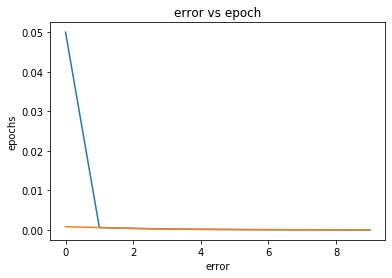

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('error')
plt.ylabel('epochs')
plt.title('error vs epoch')
plt.show()

In [20]:
y_train_predict = np.ravel(model.predict(samples)).reshape((samples.shape[0], 2))
print(y_train_predict.shape)

(30550, 2)


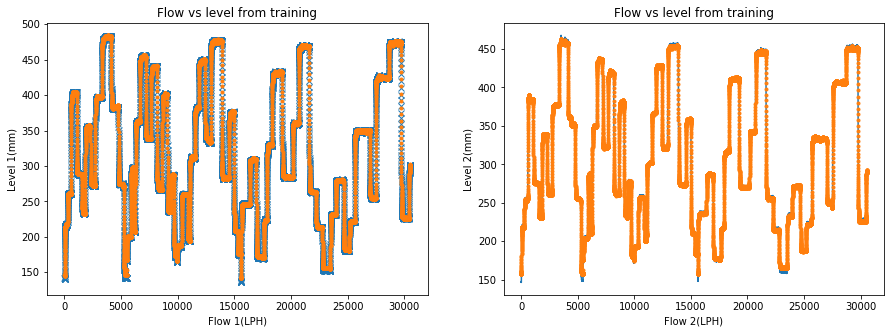

In [30]:
plt.figure(figsize=(15,5))      
plt.subplot(1, 2, 1)
outtrain1 = np.ravel(scaler1.inverse_transform(allinlist(y_train_predict[:,0])))
outtrain2 = np.ravel(scaler2.inverse_transform(allinlist(y_train_predict[:,1])))
plt.plot(input1_train[0:samples.shape[0]],'x')
plt.plot(outtrain1,'.')
# plt.scatter(output1_train_s,output2_train_s,s=1)
plt.xlabel('Flow 1(LPH)')
plt.ylabel('Level 1(mm)')
plt.title('Flow vs level from training')
plt.subplot(1, 2, 2)
plt.plot(input2_train[0:samples.shape[0]],'-')
plt.plot(outtrain2,'.')
plt.xlabel('Flow 2(LPH)')
plt.ylabel('Level 2(mm)')
plt.title('Flow vs level from training')
# plt.scatter(output1_train_s,output2_train_s,s=1)
plt.show()

In [28]:
samples2, targets2 = create_dataset(input1_test_s,input2_test_s ,output1_test_s,output2_test_s,window_size)
y_test_predict = np.ravel(model.predict(samples2)).reshape((samples2.shape[0], 2))
print(y_test_predict.shape)

(13093, 2)


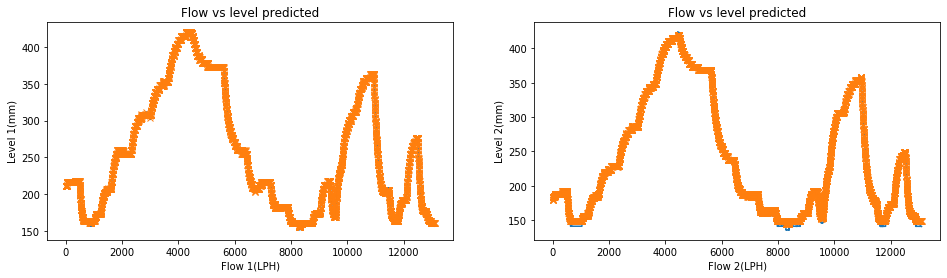

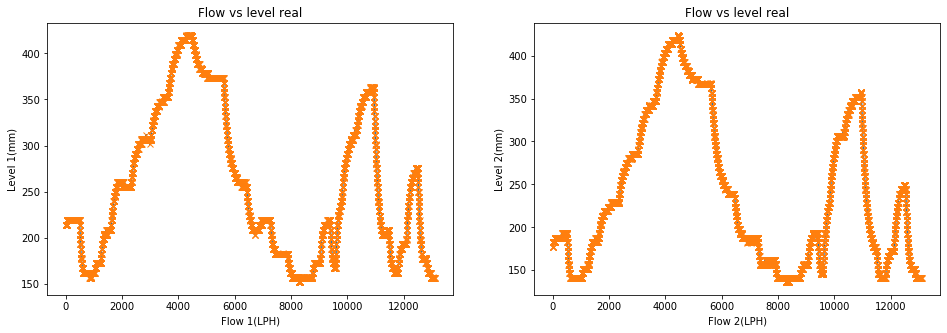

In [37]:
outtest1 = np.ravel(scaler3.inverse_transform(allinlist(y_test_predict[:,0])))
outtest2 = np.ravel(scaler4.inverse_transform(allinlist(y_test_predict[:,1])))
# len(outtest2)
plt.figure(figsize=(16,4))      
plt.subplot(1, 2, 1)
plt.plot(input1_test[0:samples2.shape[0]],'-')
plt.plot(outtest1,'x')
plt.xlabel('Flow 1(LPH)')
plt.ylabel('Level 1(mm)')
plt.title('Flow vs level predicted')
plt.subplot(1, 2, 2)
plt.plot(input2_test[0:samples2.shape[0]],'-')
plt.plot(outtest2,'x')
plt.xlabel('Flow 2(LPH)')
plt.ylabel('Level 2(mm)')
plt.title('Flow vs level predicted')

plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.plot(input1_test[0:samples2.shape[0]],'-')
plt.plot(output1_test[0:samples2.shape[0]],'x')
plt.xlabel('Flow 1(LPH)')
plt.ylabel('Level 1(mm)')
plt.title('Flow vs level real')
plt.subplot(1, 2, 2)
plt.plot(input2_test[0:samples2.shape[0]],'-')
plt.plot(output2_test[0:samples2.shape[0]],'x')
plt.xlabel('Flow 2(LPH)')
plt.ylabel('Level 2(mm)')
plt.title('Flow vs level real')
plt.show()

# MSE

In [38]:
trainScore = (mean_squared_error(outtrain2,output2_train[0:samples.shape[0]])) + (mean_squared_error(outtrain1,output1_train[0:samples.shape[0]]))
print("trainScore :",trainScore , "MSE")

testScore = (mean_squared_error(outtest2,output2_test[0:samples2.shape[0]])) + (mean_squared_error(outtest1,output1_test[0:samples2.shape[0]]))
print("testScore :",testScore , "MSE")


trainScore : 8.188443837942145 MSE
testScore : 13.912228398740865 MSE
